In [1]:
import glob
import pandas as pd

def load_results(pattern):
    """
    Reads all files matching `pattern`, expects lines of the form:
      <lang_goal> <avg_success> <avg_step> <avg_success_step> <avg_reward>
    Returns a single DataFrame with one row per line.
    """
    records = []
    for path in glob.glob(pattern):
        with open(path, "r") as f:
            for line in f:
                # split from the right into 5 parts so that lang_goal can contain spaces
                parts = line.strip().rsplit(maxsplit=4)
                if len(parts) != 5:
                    continue  # skip malformed lines
                lang_goal, s_succ, s_step, s_succ_step, s_reward = parts
                avg_success, avg_step, avg_success_step, avg_reward = map(
                    float, [s_succ, s_step, s_succ_step, s_reward]
                )
                records.append({
                    "file": path,
                    "lang_goal": lang_goal,
                    "avg_success": avg_success,
                    "avg_step": avg_step,
                    "avg_success_step": avg_success_step,
                    "avg_reward": avg_reward
                })
    return pd.DataFrame(records)

In [2]:
result_dfs = {}

In [3]:
result_dfs['seen_pretrained_1'] = load_results("../logs/2025-07-09-17-02-46-test-grasp-a2/results/*.txt")
result_dfs['seen_pretrained_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,get something to drink,0.733333,3.733333,4.000000,-0.090322
1,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,get something to hold other things,1.000000,1.066667,1.066667,0.987242
2,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,I want a round object,0.866667,2.266667,1.384615,0.638242
3,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,give me the cup,0.933333,2.666667,2.714286,0.635518
4,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,get something to eat,1.000000,2.466667,2.466667,0.775306
5,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,give me the thera_med,0.933333,5.066667,4.857143,0.026654
6,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,I need a cup,0.866667,1.666667,1.692308,0.665337
7,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,give me the pear,1.000000,1.800000,1.800000,0.814220
8,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,I need a fruit,0.933333,4.066667,3.785714,0.362626
9,../logs/2025-07-09-17-02-46-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [4]:
result_dfs['seen_pretrained_1'][['avg_success', 'avg_step']].mean()

avg_success    0.926667
avg_step       2.580000
dtype: float64

In [5]:
result_dfs['unseen_pretrained_1'] = load_results("../logs/2025-07-09-17-49-02-test-grasp-a2-unseen/results/*.txt")
result_dfs['unseen_pretrained_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-07-09-17-49-02-test-grasp-a2-unse...,I need a suger,1.000000,1.333333,1.333333,0.967195
1,../logs/2025-07-09-17-49-02-test-grasp-a2-unse...,give me the suger,0.933333,4.266667,4.000000,0.346384
2,../logs/2025-07-09-17-49-02-test-grasp-a2-unse...,give me the tea box,0.933333,2.600000,2.214286,0.545181
3,../logs/2025-07-09-17-49-02-test-grasp-a2-unse...,I need a container,1.000000,2.000000,2.000000,0.788160
4,../logs/2025-07-09-17-49-02-test-grasp-a2-unse...,get something to clean,0.933333,2.133333,1.714286,0.662628


In [6]:
result_dfs['unseen_pretrained_1'][['avg_success', 'avg_step']].mean()

avg_success    0.960000
avg_step       2.466667
dtype: float64

# My train

In [7]:
result_dfs['seen_mytrained_1'] = load_results("../logs/2025-07-21-11-08-08-test-grasp-a2/results/*.txt")
result_dfs['seen_mytrained_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,get something to drink,0.400000,3.800000,3.166667,-0.602179
1,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,get something to hold other things,0.800000,3.666667,2.583333,0.227926
2,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,I want a round object,1.000000,1.466667,1.466667,0.905007
3,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,give me the cup,0.866667,2.733333,2.230769,0.572455
4,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,get something to eat,1.000000,2.400000,2.400000,0.747388
5,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,give me the thera_med,0.800000,4.733333,3.916667,-0.003845
6,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,I need a cup,1.000000,1.066667,1.066667,0.979258
7,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,give me the pear,1.000000,2.666667,2.666667,0.585692
8,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,I need a fruit,0.800000,4.666667,3.833333,-0.072960
9,../logs/2025-07-21-11-08-08-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [8]:
result_dfs['seen_mytrained_1'][['avg_success', 'avg_step']].mean()

avg_success    0.866667
avg_step       2.820000
dtype: float64

In [9]:
result_dfs['unseen_mytrained_1'] = load_results("../logs/2025-07-21-11-59-39-test-grasp-a2-unseen/results/*.txt")
result_dfs['unseen_mytrained_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-07-21-11-59-39-test-grasp-a2-unse...,I need a suger,0.866667,2.333333,1.846154,0.541670
1,../logs/2025-07-21-11-59-39-test-grasp-a2-unse...,give me the suger,1.000000,4.600000,4.600000,0.339774
2,../logs/2025-07-21-11-59-39-test-grasp-a2-unse...,give me the tea box,0.800000,5.666667,5.083333,-0.431294
3,../logs/2025-07-21-11-59-39-test-grasp-a2-unse...,I need a container,1.000000,1.266667,1.266667,0.946751
4,../logs/2025-07-21-11-59-39-test-grasp-a2-unse...,get something to clean,0.866667,2.533333,1.692308,0.351159


In [10]:
result_dfs['unseen_mytrained_1'][['avg_success', 'avg_step']].mean()

avg_success    0.906667
avg_step       3.280000
dtype: float64

In [11]:
result_dfs['seen_mytrained_2'] = load_results("../logs/2025-07-28-13-11-55-test-grasp-a2/results/*.txt")
result_dfs['unseen_mytrained_2'] = load_results("../logs/2025-07-28-15-16-53-test-grasp-a2-unseen/results/*.txt")

In [12]:
result_dfs['seen_mytrained_3'] = load_results("../logs/2025-07-29-12-01-30-test-grasp-a2/results/*.txt")
result_dfs['unseen_mytrained_3'] = load_results("../logs/2025-07-29-13-00-17-test-grasp-a2-unseen/results/*.txt")

In [13]:
result_dfs['seen_efficient_1'] = load_results("../logs/2025-08-19-15-03-54-test-grasp-a2/results/*.txt")
result_dfs['unseen_efficient_1'] = load_results("../logs/2025-08-19-15-56-16-test-grasp-a2-unseen/results/*.txt")

In [14]:
result_dfs['seen_efficient_2'] = load_results("../logs/2025-08-25-18-49-56-test-grasp-a2/results/*.txt")
result_dfs['unseen_efficient_2'] = load_results("../logs/2025-08-25-19-40-48-test-grasp-a2-unseen/results/*.txt")

In [15]:
result_dfs['seen_efficient_3'] = load_results("../logs/2025-08-25-22-08-17-test-grasp-a2/results/*.txt")
result_dfs['unseen_efficient_3'] = load_results("../logs/2025-08-25-23-04-04-test-grasp-a2-unseen/results/*.txt")

In [16]:
result_dfs['seen_efficient_2layers'] = load_results('../logs/2025-08-28-18-24-57-test-grasp-a2/results/*.txt')
result_dfs['unseen_efficient_2layers'] = load_results('../logs/2025-08-28-19-14-45-test-grasp-a2-unseen/results/*.txt')

In [17]:
result_dfs['seen_efficient_2layers_100'] = load_results('../logs/2025-08-28-20-12-44-test-grasp-a2/results/*.txt')
result_dfs['unseen_efficient_2layers_100'] = load_results('../logs/2025-08-28-20-54-07-test-grasp-a2-unseen/results/*.txt')

In [18]:
result_dfs['seen_efficient_2layers_50'] = load_results('../logs/2025-08-28-22-06-32-test-grasp-a2/results/*.txt')
result_dfs['unseen_efficient_2layers_50'] = load_results('../logs/2025-08-28-22-45-27-test-grasp-a2-unseen/results/*.txt')

In [19]:
result_dfs['seen_efficient_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,get something to drink,0.733333,4.333333,4.909091,-0.261311
1,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,get something to hold other things,1.000000,1.200000,1.200000,0.975800
2,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,I want a round object,0.933333,2.600000,2.214286,0.609304
3,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,give me the cup,0.933333,3.266667,3.214286,0.593438
4,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,get something to eat,0.933333,3.666667,3.357143,0.463866
5,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,give me the thera_med,0.800000,5.600000,5.000000,-0.204636
6,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,I need a cup,1.000000,2.066667,2.066667,0.767129
7,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,give me the pear,0.933333,1.866667,1.785714,0.661768
8,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,I need a fruit,0.800000,5.133333,4.416667,0.025588
9,../logs/2025-08-19-15-03-54-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [20]:
result_dfs['unseen_efficient_1']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-19-15-56-16-test-grasp-a2-unse...,I need a suger,1.000000,1.333333,1.333333,0.933221
1,../logs/2025-08-19-15-56-16-test-grasp-a2-unse...,give me the suger,0.800000,4.000000,3.333333,0.144913
2,../logs/2025-08-19-15-56-16-test-grasp-a2-unse...,give me the tea box,0.666667,6.733333,6.100000,-0.898804
3,../logs/2025-08-19-15-56-16-test-grasp-a2-unse...,I need a container,0.800000,2.733333,1.416667,0.268370
4,../logs/2025-08-19-15-56-16-test-grasp-a2-unse...,get something to clean,1.000000,1.733333,1.733333,0.602537


In [21]:
result_dfs['seen_efficient_2layers']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,get something to drink,0.600000,2.133333,2.555556,0.297738
1,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,get something to hold other things,1.000000,2.066667,2.066667,0.867360
2,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,I want a round object,1.000000,2.733333,2.733333,0.649817
3,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,give me the cup,0.733333,4.200000,3.454545,0.221734
4,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,get something to eat,1.000000,2.666667,2.666667,0.763624
5,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,give me the thera_med,1.000000,3.000000,3.000000,0.719985
6,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,I need a cup,1.000000,1.066667,1.066667,0.987469
7,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,give me the pear,1.000000,3.666667,3.666667,0.417600
8,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,I need a fruit,0.733333,5.000000,3.909091,-0.150748
9,../logs/2025-08-28-18-24-57-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [22]:
result_dfs['unseen_efficient_2layers']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-19-14-45-test-grasp-a2-unse...,I need a suger,1.000000,1.333333,1.333333,0.935286
1,../logs/2025-08-28-19-14-45-test-grasp-a2-unse...,give me the suger,0.800000,4.666667,4.000000,0.108050
2,../logs/2025-08-28-19-14-45-test-grasp-a2-unse...,give me the tea box,0.333333,7.400000,6.200000,-1.877879
3,../logs/2025-08-28-19-14-45-test-grasp-a2-unse...,I need a container,0.800000,3.800000,3.000000,0.009028
4,../logs/2025-08-28-19-14-45-test-grasp-a2-unse...,get something to clean,1.000000,1.466667,1.466667,0.912423


In [23]:
result_dfs['seen_efficient_2layers_100']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,get something to drink,0.866667,1.133333,1.153846,0.820322
1,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,get something to hold other things,0.933333,1.266667,1.285714,0.857947
2,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,I want a round object,0.933333,1.666667,1.214286,0.780806
3,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,give me the cup,1.000000,3.000000,3.000000,0.667393
4,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,get something to eat,1.000000,2.666667,2.666667,0.672191
5,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,give me the thera_med,1.000000,3.133333,3.133333,0.741343
6,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,I need a cup,1.000000,1.066667,1.066667,0.978479
7,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,give me the pear,1.000000,3.266667,3.266667,0.547453
8,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,I need a fruit,0.933333,4.333333,4.071429,0.135840
9,../logs/2025-08-28-20-12-44-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [24]:
result_dfs['unseen_efficient_2layers_100']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-20-54-07-test-grasp-a2-unse...,I need a suger,1.000000,2.466667,2.466667,0.566402
1,../logs/2025-08-28-20-54-07-test-grasp-a2-unse...,give me the suger,0.600000,6.066667,4.777778,-0.721716
2,../logs/2025-08-28-20-54-07-test-grasp-a2-unse...,give me the tea box,0.600000,7.000000,6.333333,-1.251715
3,../logs/2025-08-28-20-54-07-test-grasp-a2-unse...,I need a container,0.600000,4.600000,2.333333,-0.558944
4,../logs/2025-08-28-20-54-07-test-grasp-a2-unse...,get something to clean,0.933333,1.866667,1.428571,0.753831


In [25]:
result_dfs['seen_efficient_2layers_50']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,get something to drink,1.000000,1.533333,1.533333,0.893961
1,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,get something to hold other things,1.000000,1.066667,1.066667,0.998325
2,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,I want a round object,1.000000,2.266667,2.266667,0.813202
3,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,give me the cup,1.000000,3.133333,3.133333,0.725227
4,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,get something to eat,1.000000,2.666667,2.666667,0.722227
5,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,give me the thera_med,0.866667,2.866667,2.538462,0.582987
6,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,I need a cup,1.000000,1.133333,1.133333,0.981734
7,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,give me the pear,1.000000,1.266667,1.266667,0.946182
8,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,I need a fruit,0.866667,4.133333,3.538462,0.169461
9,../logs/2025-08-28-22-06-32-test-grasp-a2/resu...,grasp a round object,1.000000,1.000000,1.000000,1.000000


In [26]:
result_dfs['unseen_efficient_2layers_50']

,file,lang_goal,avg_success,avg_step,avg_success_step,avg_reward
0,../logs/2025-08-28-22-45-27-test-grasp-a2-unse...,I need a suger,1.000000,2.533333,2.533333,0.604478
1,../logs/2025-08-28-22-45-27-test-grasp-a2-unse...,give me the suger,0.600000,6.333333,5.222222,-0.769261
2,../logs/2025-08-28-22-45-27-test-grasp-a2-unse...,give me the tea box,0.533333,7.000000,6.125000,-1.425466
3,../logs/2025-08-28-22-45-27-test-grasp-a2-unse...,I need a container,0.600000,4.533333,3.000000,-0.487425
4,../logs/2025-08-28-22-45-27-test-grasp-a2-unse...,get something to clean,1.000000,1.266667,1.266667,0.953737


# Analyze results

In [27]:
results_df = pd.concat(result_dfs.values(), keys=result_dfs.keys())
results_df.reset_index(level=0, names=['experiment'], inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df.groupby('experiment', as_index=False)[['avg_success', 'avg_step']].mean().round(2)

,experiment,avg_success,avg_step
0,seen_efficient_1,0.91,3.07
1,seen_efficient_2,0.88,2.55
2,seen_efficient_2layers,0.91,2.75
3,seen_efficient_2layers_100,0.97,2.25
4,seen_efficient_2layers_50,0.97,2.11
5,seen_efficient_3,0.92,2.91
6,seen_mytrained_1,0.87,2.82
7,seen_mytrained_2,0.93,2.64
8,seen_mytrained_3,0.87,2.81
9,seen_pretrained_1,0.93,2.58


In [ ]:
result_dfs['unseen_mytrained_2']

In [ ]:
result_dfs['unseen_pretrained_1']

# Tensorlogs

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import pandas as pd
import glob, os

# Discover all TensorBoard event files in ../tensorlogs/*/
event_files = sorted(glob.glob("../tensorlogs/*/events.out.tfevents.*"))
if not event_files:
    raise FileNotFoundError("No TensorBoard event files found under ../tensorlogs/*/")

print(f"Found {len(event_files)} event files:")
for f in event_files:
    print(" -", f)


def load_scalars(event_file: str) -> pd.DataFrame:
    """Load all scalar tags from a TensorBoard event file into a DataFrame.
    Columns: run, tag, step, value
    """
    run_name = os.path.basename(os.path.dirname(event_file))
    acc = EventAccumulator(event_file, size_guidance={'scalars': 0})
    acc.Reload()
    tags = acc.Tags().get('scalars', [])
    rows = []
    for tag in tags:
        for ev in acc.Scalars(tag):
            rows.append({
                'run': run_name,
                'tag': tag,
                'step': ev.step,
                'value': ev.value
            })
    return pd.DataFrame(rows)

# Load all runs
scalar_dfs = [load_scalars(f) for f in event_files]
all_scalars_df = pd.concat(scalar_dfs, ignore_index=True)

unique_tags = sorted(all_scalars_df['tag'].unique())
print("Scalar tags discovered:", unique_tags)

# Create a summary table: last (max step) value per run/tag
last_values = (all_scalars_df
               .sort_values('step')
               .groupby(['run', 'tag'])
               .tail(1)
               .pivot(index='run', columns='tag', values='value'))
print("\nLast recorded values per run/tag:")
last_values

Found 5 event files:
 - ../tensorlogs/2025-07-20_17-52-02_BC_PP/events.out.tfevents.1753026722.2080tix2
 - ../tensorlogs/2025-07-28_12-08-39_BC_PP/events.out.tfevents.1753697319.2080tix2
 - ../tensorlogs/2025-08-12_17-22-10_BC_PP/events.out.tfevents.1755012130.2080tix2
 - ../tensorlogs/2025-08-26_11-58-23_BC_PP/events.out.tfevents.1756202303.2080tix2
 - ../tensorlogs/2025-08-26_11-59-07_BC_PP/events.out.tfevents.1756202347.2080tix2
Scalar tags discovered: ['loss/epoch', 'loss/iteration']

Last recorded values per run/tag:


tag,loss/epoch,loss/iteration
run,,
2025-07-20_17-52-02_BC_PP,0.310417,0.281509
2025-07-28_12-08-39_BC_PP,0.253234,0.000301
2025-08-12_17-22-10_BC_PP,0.277787,0.072370
2025-08-26_11-59-07_BC_PP,0.120470,0.004114


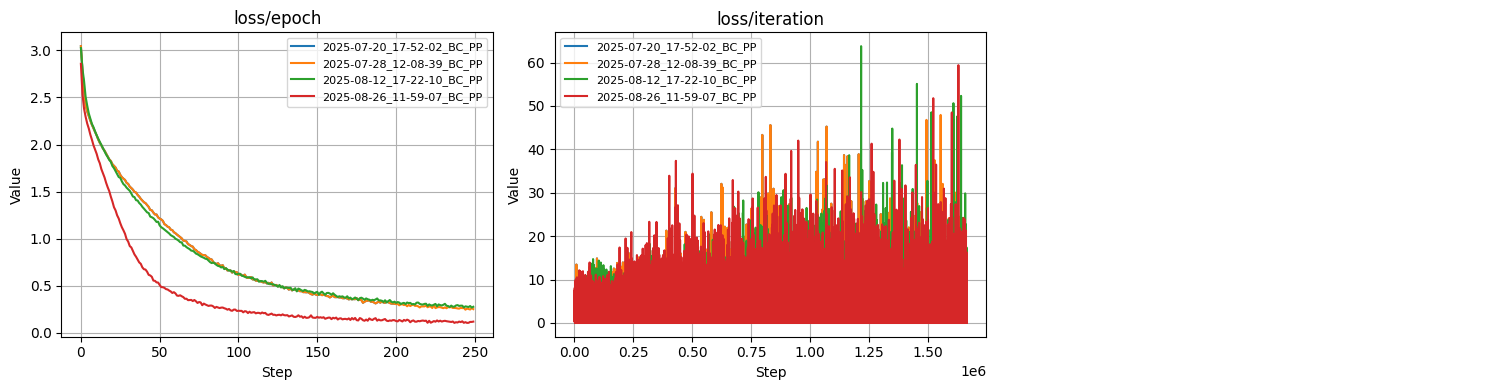

In [2]:
# Plot each tag across runs
import math

if unique_tags:
    n_tags = len(unique_tags)
    ncols = 3
    nrows = math.ceil(n_tags / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), squeeze=False)

    for idx, tag in enumerate(unique_tags):
        r = idx // ncols
        c = idx % ncols
        ax = axes[r][c]
        tag_df = all_scalars_df[all_scalars_df['tag'] == tag]
        for run_name, run_df in tag_df.groupby('run'):
            ax.plot(run_df['step'], run_df['value'], label=run_name)
        ax.set_title(tag)
        ax.set_xlabel('Step')
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend(fontsize=8)

    # Hide any unused subplots
    for j in range(n_tags, nrows * ncols):
        r = j // ncols
        c = j % ncols
        axes[r][c].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No scalar tags to plot.")